In [18]:
import matplotlib.pyplot as plt
import numpy as np
BIOMARKER_DIR = '/home/groups/dpwall/briannac/sequence_based_biomarkers/'

In [1]:
import pandas as pd

In [17]:
(df.astype(int)>-1).sum().sum()

456900000

In [31]:
pvals = np.load('/home/groups/dpwall/briannac/sequence_based_biomarkers/results/pvalues/pvals_autism_otu99.npy')

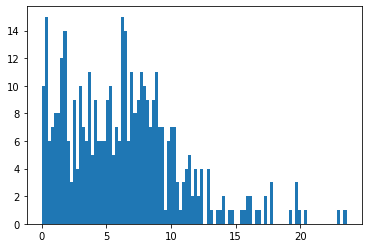

In [32]:
plt.hist(pvals, bins=100)
plt.show()

In [ ]:
plt.hist(np.log10(pvals))
plt

In [42]:
a = np.array([[1,2,3,4, 0, 0, 0.0], [1,2,2,2,0,0,0.0]])

In [44]:
a[a==0] = np.nan
mstats.rankdata(np.ma.masked_invalid(a), axis=1)

array([[1., 2., 3., 4., 0., 0., 0.],
       [1., 3., 3., 3., 0., 0., 0.]])

In [40]:
mstats.rankdata(np.ma.masked_invalid(a))

array([1., 2., 3., 4., 0., 0., 0.])

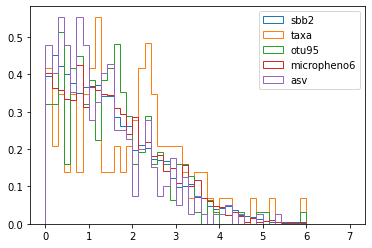

In [16]:
dataset='obesity'
plt.figure()
for sbb in ['sbb2', 'taxa', 'otu95', 'micropheno6', 'asv']:
    pvals_data = np.load(BIOMARKER_DIR + 'results/pvalues/pvals_obesity_%s.npy' % sbb)
    plt.hist(pvals_data, bins=np.linspace(0,7,50), density=True, histtype='step', label=sbb)
plt.legend()
plt.show()

In [ ]:
dataset='obesity'
plt.figure()
for sbb in ['sbb2', 'taxa', 'otu95', 'micropheno6', 'asv']:
    pvals_data = np.load(BIOMARKER_DIR + 'results/pvalues/pvals_%s_%s.npy' % (dataset, sbb))
    plt.hist(pvals_data, bins=np.linspace(0,7,50), density=True, histtype='step', label=sbb)
plt.legend()
plt.show()

In [138]:
import numpy as np
from scipy.stats import *

import numpy as np
from scipy.stats import *
def wilcoxon_fast(diffs, diffs_rank):
    x = diffs_rank[diffs>0]
    y = diffs_rank[diffs<0]-sum(diffs==0)
    count = len(x) + len(y)
    print(max(y))
    r_plus = np.sum(x)
    r_minus = np.sum(y)
    W = r_plus - r_minus
    se = np.sqrt(count*(count+1)*(2*count+1)/6)
    z = W/se
    return abs(z)


In [137]:
diffs=np.array([np.random.randint(-10,11) for i in range(10000)])
print(wilcoxon_fast(diffs, rankdata(-abs(diffs))))


8637.5
1701981.0
3.153511555695308


In [101]:
np.median(diffs)

0.0

In [28]:
pvals_data

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.331476433840331e-295,
 3.222815072633627e-289,
 1.5754203928720434e-287,
 1.0189961498351781e-282,
 5.448797028559143e-262,
 5.994439798811648e-253,
 8.141128079657763e-234,
 7.453598378055309e-226,
 1.6497698477732523e-223,
 3.07564620750749e-219,
 5.265865673109025e-211,
 3.5565644355616634e-210,
 1.914497281267071e-209,
 1.3206350702020337e-206,
 2.082823211615683e-205,
 7.014740387339588e-200,
 9.551722881288291e-179,
 6.166514882125805e-174,
 8.401506490090962e-173,
 2.929991164942429e-168,
 5.733031264012467e-159,
 1.7134375215440888e-156,
 7.023785130676265e-155,
 1.487079581430008e-153,
 1.5704534579173438e-147,
 2.351010019032362e-140,
 9.005190738225623e-132,
 5.008871029062155e-126,
 2.164341059747671e-120,
 9.000903179849157e-120,
 9.222347994020321e-116,
 5.239805242752846e-115,
 4.08276209785717e-111,
 1.9517282037964087e-109,
 2.3506402998778007e-105,
 1.2

In [23]:
dataset='obesity'
fdr_dict = dict()
for biomarker in ['asv', 'taxa', 'sbb1', 'otu90', 'otu95', 'otu97', 'otu99', 'micropheno4', 'micropheno6', 'micropheno8']:
    fdr_dict[biomarker] = np.load(BIOMARKER_DIR + 'intermediate_files/nonparametric_pvalues/%s_%s/false_discovery_count_%s_%s_100.npy' % (dataset, biomarker, dataset,biomarker))


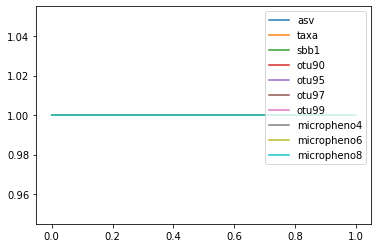

In [24]:
plt.figure()
for biomarker in fdr_dict:
    fdrs = fdr_dict[biomarker]
    plt.plot([i/len(fdrs) for i in range(len(fdrs))], [fdr/len(fdrs)/100 for fdr in fdrs], label=biomarker)
plt.legend()
plt.show()

In [12]:
[i for i in range(fdrs)]

TypeError: only integer scalar arrays can be converted to a scalar index

In [6]:
dataset = sys.argv[1]
biomarker = sys.argv[2]

BIOMARKER_DIR = '/home/groups/dpwall/briannac/sequence_based_biomarkers/'
PERMUTE_START = sys.argv[3]
PERMUTE_END = sys.argv[4]

pvals_data = sorted(np.load(BIOMARKER_DIR + 'results/pvalues/pvals_%s_%s.npy' % (dataset, biomarker)))
permuted_phenos = np.load(BIOMARKER_DIR + 'intermediate_files/permutation_test/%s_phenos_permuted.npy' % dataset).astype(int)[PERMUTE_START:PERMUTE_END]
pvals_count = np.zeros(len(pvals_data)).astype(int)
step_size=100000
n_iters=len(permuted_phenos)
person_biomarker = scipy.sparse.load_npz(BIOMARKER_DIR + 'results/generate_biomarkers/sample_vs_biomarker_%s_%s.npz' % (biomarker, dataset))

t = time.time()
print('person x biomarker shape: ', np.shape(person_biomarker))
for chunk_start in tqdm(np.arange(0,np.shape(person_biomarker)[1], step=step_size)):
    chunk_end = min(chunk_start+step_size, np.shape(person_biomarker)[1])
    person_biomarker_current = person_biomarker[:,chunk_start:chunk_end].toarray()
    if 'autism' in dataset:
        d = person_biomarker_current[::2]-person_biomarker_current[1::2]
        diffs_rank = np.apply_along_axis(arr=d, axis=0,func1d=lambda x:rankdata(abs(x)))
    if 'obesity' in dataset:
        ranks = rankdata(person_biomarker_current, axis=0)
    for i in range(n_iters):
        if 'autism' in dataset:
            diffs = np.apply_along_axis(arr=d, axis=0,func1d=lambda x: x*permuted_phenos[i,::2])
            pvals_permute = [wilcoxon_fast(d, rank) for d, rank in zip(diffs.transpose(), diffs_rank.transpose())]
        elif 'obesity' in dataset:
            affected = ranks[np.where(permuted_phenos[i])[0],:]
            unaffected = ranks[np.where(np.invert(permuted_phenos[i]))[0],:]
            pvals_permute = sorted([mannwhitneyu_fast(
                affected[:,i],
                unaffected[:,i]) for i in range(np.shape(person_biomarker_current)[1])])
        pvals_count = pvals_count + countLessThanEqual(pvals_data, pvals_permute)
#fdr = [p/(i+.0001)/n_iters for i,p in enumerate(pvals_count)]
print(time.time()-t)
#np.save(BIOMARKER_DIR + 'results/pvalues/%s_%s/false_discovery_count_%s_%s_%i.npy' % (dataset, biomarker, dataset, biomarker, PERMUTE_START), pvals_count)



  0%|          | 0/11 [00:00<?, ?it/s]

person x biomarker shape:  (640, 109446)



 45%|████▌     | 5/11 [12:50<15:26, 154.36s/it]

KeyboardInterrupt: 

In [63]:
df = pd.DataFrame(person_biomarker.todense()).transpose()

In [64]:
dups = df.duplicated()

In [65]:
sum(dups)

0

In [105]:
dataset = 'autism' #sys.argv[1]
biomarker = 'sbb1' #sys.argv[2]

BIOMARKER_DIR = '/home/groups/dpwall/briannac/sequence_based_biomarkers/'
PERMUTE_START = 0
PERMUTE_END = 100

pvals_data = sorted(np.load(BIOMARKER_DIR + 'results/pvalues/pvals_%s_%s.npy' % (dataset, biomarker)))
permuted_phenos = np.load(BIOMARKER_DIR + 'intermediate_files/permutation_test/%s_phenos_permuted.npy' % dataset).astype(int)[PERMUTE_START:PERMUTE_END]
pvals_count = np.zeros(len(pvals_data)).astype(int)
step_size=100000
n_iters=len(permuted_phenos)
person_biomarker = scipy.sparse.load_npz(BIOMARKER_DIR + 'results/generate_biomarkers/sample_vs_biomarker_%s_%s.npz' % (biomarker, dataset))

t = time.time()
print('person x biomarker shape: ', np.shape(person_biomarker))
for chunk_start in tqdm(np.arange(0,np.shape(person_biomarker)[1], step=step_size)):
    chunk_end = min(chunk_start+step_size, np.shape(person_biomarker)[1])
    person_biomarker_current = person_biomarker[:,chunk_start:chunk_end].toarray()
    if 'autism' in dataset:
        d = person_biomarker_current[::2]-person_biomarker_current[1::2]
        diffs_rank = np.apply_along_axis(arr=d, axis=0,func1d=lambda x:rankdata(abs(x)))
    if 'obesity' in dataset:
        ranks = rankdata(person_biomarker_current, axis=0)
    for i in range(n_iters):
        print(i)
        if 'autism' in dataset:
            diffs = np.apply_along_axis(arr=d, axis=0,func1d=lambda x: x*permuted_phenos[i,::2])
            pvals_permute = [wilcoxon_fast(d, rank) for d, rank in zip(diffs.transpose(), diffs_rank.transpose())]
        elif 'obesity' in dataset:
            affected = ranks[np.where(permuted_phenos[i])[0],:]
            unaffected = ranks[np.where(np.invert(permuted_phenos[i]))[0],:]
            pvals_permute = sorted([mannwhitneyu_fast(
                affected[:,i],
                unaffected[:,i]) for i in range(np.shape(person_biomarker_current)[1])])
        pvals_count = pvals_count + countLessThanEqual(pvals_data, pvals_permute)
#fdr = [p/(i+.0001)/n_iters for i,p in enumerate(pvals_count)]
print(time.time()-t)
np.save(BIOMARKER_DIR + 'results/pvalues/%s_%s/false_discovery_count_%s_%s.npy' % (datset, biomarker, dataset, biomarker), pvals_count)














  0%|          | 0/1 [00:00<?, ?it/s]

person x biomarker shape:  (640, 644)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97














100%|██████████| 1/1 [00:09<00:00,  9.25s/it]

98
99
9.260571241378784


In [98]:
def countLessThanEqual(pvals_data, pvals_permute):
    idx_data = 0
    idx_permute = 0
    pvals_count = np.zeros(len(pvals_data))
    while (idx_permute<len(pvals_permute)) & (idx_data<len(pvals_data)):
        if pvals_permute[idx_permute]<=pvals_data[idx_data]:
            pvals_count[idx_data:] = pvals_count[idx_data:] + 1
            idx_permute = idx_permute + 1
        else:
            idx_data = idx_data + 1
    return pvals_count

In [97]:
pvals_count

array([1., 1., 2., 2., 8., 8., 8., 8., 8.])

In [9]:
print('person x biomarker shape: ', np.shape(person_biomarker))
for chunk_start in tqdm(np.arange(0,np.shape(person_biomarker)[1], step=step_size)):
    chunk_end = min(chunk_start+step_size, np.shape(person_biomarker)[1])
    person_biomarker_current = person_biomarker[:,chunk_start:chunk_end].toarray()
    if 'autism' in dataset:
        d = person_biomarker_current[::2]-person_biomarker_current[1::2]
        diffs_rank = np.apply_along_axis(arr=d, axis=0,func1d=lambda x:rankdata(abs(x)))
    if 'obesity' in dataset:
        ranks = rankdata(person_biomarker_current, axis=0)
    for i in range(n_iters):
        if 'autism' in dataset:
            diffs = np.apply_along_axis(arr=d, axis=0,func1d=lambda x: x*permuted_phenos[i,::2])
            pvals_permute = [wilcoxon_fast(d, rank) for d, rank in zip(diffs.transpose(), diffs_rank.transpose())]
        elif 'obesity' in dataset:
            affected = ranks[np.where(permuted_phenos[i])[0],:]
            unaffected = ranks[np.where(np.invert(permuted_phenos[i]))[0],:]
            pvals_permute = [mannwhitneyu_fast(
                affected[:,i],
                unaffected[:,i]) for i in range(np.shape(person_biomarker_current)[1])]
        pvals_count = pvals_count + countEleLessThanOrEqual(pvals_data, pvals_permute)
fdr = [p/i/n_iters for i,p in enumerate(pvals_count)]

  0%|          | 0/1 [00:00<?, ?it/s]

person x biomarker shape:  (640, 183)


100%|██████████| 1/1 [00:00<00:00,  3.19it/s]
/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


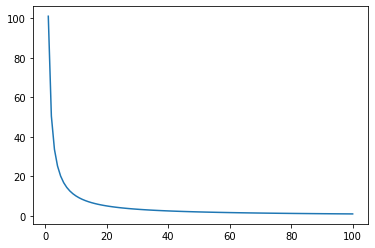

In [8]:
import matplotlib.pyplot as plt
plt.plot(fdr)
plt.show()

In [5]:
import scipy.sparse
import numpy as np
import pandas as pd

In [47]:
def sparse_unique_columns(M):
    M = M.tocsc()
    m, n = M.shape
    if not M.has_sorted_indices:
        M.sort_indices()
    if not M.has_canonical_format:
        M.sum_duplicates()
    sizes = np.diff(M.indptr)
    idx = np.argsort(sizes)
    Ms = M@scipy.sparse.csc_matrix((np.ones((n,)), idx, np.arange(n+1)), (n, n))
    ssizes = np.diff(Ms.indptr)
    ssizes[1:] -= ssizes[:-1]
    grpidx, = np.where(ssizes)
    grpidx = np.concatenate([grpidx, [n]])
    if ssizes[0] == 0:
        counts = [np.array([0, grpidx[0]])]
    else:
        counts = [np.zeros((1,), int)]
    ssizes = ssizes[grpidx[:-1]].cumsum()
    for i, ss in enumerate(ssizes):
        gil, gir = grpidx[i:i+2]
        pl, pr = Ms.indptr[[gil, gir]]
        dv = Ms.data[pl:pr].view(f'V{ss*Ms.data.dtype.itemsize}')
        iv = Ms.indices[pl:pr].view(f'V{ss*Ms.indices.dtype.itemsize}')
        idxi = np.lexsort((dv, iv))
        dv = dv[idxi]
        iv = iv[idxi]
        chng, = np.where(np.concatenate(
            [[True], (dv[1:] != dv[:-1]) | (iv[1:] != iv[:-1]), [True]]))
        counts.append(np.diff(chng))
        idx[gil:gir] = idx[gil:gir][idxi]
    counts = np.concatenate(counts)
    nu = counts.size - 1
    uniques = M@scipy.sparse.csc_matrix((np.ones((nu,)), idx[counts[:-1].cumsum()],
                                   np.arange(nu + 1)), (n, nu))
    return uniques, idx[counts[:-1].cumsum()], counts[1:]

In [48]:
uniques, idx = np.unique(pd.DataFrame(asv_biomarker.todense()), return_index=True, axis=1)

In [7]:
asv_biomarker = scipy.sparse.load_npz('/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_biomarkers/asv_vs_biomarker_sbb2_testing_autism.npz')
df = pd.DataFrame(asv_biomarker)
df

,0
0,"(0, 202)\tTrue\n (0, 208)\tTrue\n (0, 211)..."
1,"(0, 202)\tTrue\n (0, 208)\tTrue\n (0, 211)..."
2,"(0, 208)\tTrue\n (0, 211)\tTrue\n (0, 217)..."
3,"(0, 166)\tTrue\n (0, 170)\tTrue\n (0, 174)..."
4,"(0, 166)\tTrue\n (0, 174)\tTrue\n (0, 175)..."
...,...
5244,"(0, 142)\tTrue\n (0, 143)\tTrue\n (0, 147)..."
5245,"(0, 166)\tTrue\n (0, 170)\tTrue\n (0, 174)..."
5246,"(0, 166)\tTrue\n (0, 170)\tTrue\n (0, 174)..."
5247,"(0, 202)\tTrue\n (0, 208)\tTrue\n (0, 211)..."


In [ ]:
_, idx = np.unique([tuple(asv_biomarker[i,:].indices) for i in range(np.shape(asv_biomarker)[0])], return_index=True)
idx = sorted(idx)

print("Number of biomarkers after LD filtering: ", len(idx))


#np.save('%sperson_variant%d_condensed' %  (output_dir,order), person_biomarker)
biomarkers = combinations(range(len(variants)), order)

print('Computing biomarker names...')
with open(biomarker_names_file_out, 'w') as f:
    for i,biomarker in tqdm(enumerate(biomarkers)):
        if biomarker_exists[i] & (i in idx):  
            f.write('\t'.join([variants[x] for x in biomarker]) + '\t' + '\t'.join([str(x) for x in biomarker]) + '\n')
print("Writing to file")
asv_biomarker = scipy.sparse.csc_matrix(asv_biomarker[:,idx]).transpose()
person_biomarker = scipy.sparse.csc_matrix(person_biomarker[:,idx])

#with open(biomarker_names_file_out, 'w') as f:
#    f.writelines([b + '\n' for b in biomarker_names])

scipy.sparse.save_npz(asv_vs_biomarker_file_out, asv_biomarker)  # Save sparse matrix of ASV x biomarker.
scipy.sparse.save_npz(person_biomarker_file_out, person_biomarker)  # Save sparse matrix of ASV x biomarker.
            
            
            
#biomarker_names = ['\t'.join(
#    [variants[x] for x in biomarker]) + '\t' + '\t'.join([str(x) for x in biomarker]) for biomarker,biomarker_exist in tqdm(zip(biomarkers, biomarker_exists)) if biomarker_exist]

#print('removing Biomarkers in LD...')
#biomarkers = combinations(range(len(variants)), order)
#def filter(array, thresh):
#    count = Counter(array)
#    return tuple(sorted([i for i in count if count[i]>=thresh]))

#asvs_per_biomarker = [
#    filter(asv_variant[:,biomarker].indices, order) for biomarker,biomarker_exist in tqdm(zip(
#        biomarkers, biomarker_exists)) if biomarker_exist]
#_, idx = np.unique(asvs_per_biomarker, return_index=True)
#print(np.shape(idx))



#print('Computing biomarker_names...')
#biomarker_names = ['\t'.join(
#    [variants[x] for x in biomarker]) + '\t' + '\t'.join([str(x) for x in biomarker]) for biomarker,biomarker_exist in tqdm(zip(biomarkers, biomarker_exists)) if biomarker_exist] 

#print('Computing ASV_vs_biomarker...')
#asv_vs_biomarker = scipy.sparse.lil_matrix((np.shape(asv_variant)[0],len(biomarker_names)), dtype=bool)
#for biomarker,asv in tqdm(enumerate(asvs_per_biomarker)):
#    asv_vs_biomarker[asv,biomarker]= True
print("Writing to file")
asv_biomarker = scipy.sparse.csc_matrix(biomarker_asv[idx,:]).transpose()
person_biomarker = scipy.sparse.csc_matrix(person_biomarker[:,idx])

#with open(biomarker_names_file_out, 'w') as f:
#    f.writelines([b + '\n' for b in biomarker_names])

scipy.sparse.save_npz(asv_vs_biomarker_file_out, asv_biomarker)  # Save sparse matrix of ASV x biomarker.
scipy.sparse.save_npz(person_biomarker_file_out, person_biomarker)  # Save sparse matrix of ASV x biomarker.